In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# geopandas
import geopandas as gpd

In [3]:
gdf_1 = gpd.read_file("test.geojson")

In [4]:
gdf_1.head(5)

,medallion,passengers,fare,paymenttype,surcharge,mtatax,tip,tolls,total,pickuptime,dropofftime,nextpickuptime,key,hasfare,geometry
0,C87E6D2293BF8B907A0B7E4C2911AA5E,2,52,CRD,0,0.5,10.4,5.33,68.23,2007-01-13 05:30:00,2007-01-13 05:55:00,2007-01-13 06:57:00,0,True,"LINESTRING (-73.96145 40.76860, -73.96110 40.7..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-13 05:55:00,2007-01-13 06:57:00,NaT,0,False,"LINESTRING (-73.78106 40.64672, -73.78096 40.6..."
2,C87E6D2293BF8B907A0B7E4C2911AA5E,2,9.5,CRD,0,0.5,1.5,0,11.5,2007-01-13 06:57:00,2007-01-13 07:06:00,2007-01-13 07:26:00,1,True,"LINESTRING (-73.95152 40.77523, -73.95209 40.7..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-13 07:06:00,2007-01-13 07:26:00,NaT,1,False,"LINESTRING (-73.97365 40.75868, -73.97314 40.7..."
4,C87E6D2293BF8B907A0B7E4C2911AA5E,2,5,CRD,0,0.5,1,0,6.5,2007-01-13 07:26:00,2007-01-13 07:30:00,2007-01-13 07:47:00,2,True,"LINESTRING (-73.94972 40.77702, -73.95179 40.7..."


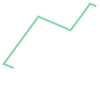

In [8]:
gdf_1.iloc[2,-1]

In [9]:
gdf_2 = gpd.read_file("nyc-zip-code-tabulation-areas-polygons.geojson")

In [10]:
gdf_2.head(5)

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,20624.692317,2.016328e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.86942 40.74916, -73.89507 40.746..."
1,2,11004,Glen Oaks,NY,Queens,36,081,0,23002.816039,2.260653e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.71068 40.75004, -73.70869 40.748..."
2,3,11040,New Hyde Park,NY,Queens,36,081,0,15749.161511,6.269333e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.70098 40.73890, -73.70309 40.744..."
3,4,11426,Bellerose,NY,Queens,36,081,0,35932.810639,4.941836e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.72270 40.75373, -73.72251 40.753..."
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,38693.565676,6.938587e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.81089 40.72717, -73.81116 40.728..."


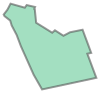

In [12]:
gdf_2.iloc[1,-1]

<AxesSubplot:>

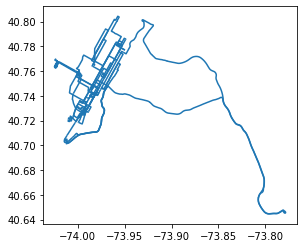

In [13]:
gdf_1.plot()

<AxesSubplot:>

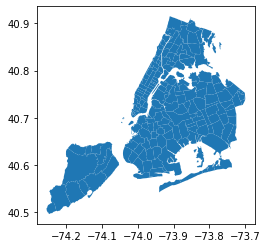

In [18]:
gdf_2.plot()

In [15]:
# heapmap using the geopandas

In [27]:
df = pd.read_csv("crash_sample.csv")

In [31]:
gdf_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        262 non-null    int64   
 1   postalCode      262 non-null    object  
 2   PO_NAME         262 non-null    object  
 3   STATE           262 non-null    object  
 4   borough         262 non-null    object  
 5   ST_FIPS         262 non-null    object  
 6   CTY_FIPS        262 non-null    object  
 7   BLDGpostalCode  262 non-null    int64   
 8   Shape_Leng      262 non-null    float64 
 9   Shape_Area      262 non-null    float64 
 10  @id             262 non-null    object  
 11  geometry        262 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(7)
memory usage: 24.7+ KB


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ZIP CODE  183 non-null    object
 1   Crashes   183 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [32]:
# convert int to string
df["ZIP CODE"] = df["ZIP CODE"].astype(str)

In [17]:
df.head(10)

,ZIP CODE,Crashes
0,11362,13
1,11001,3
2,11427,31
3,11040,4
4,10031,15
5,11413,66
6,10460,81
7,10040,7
8,10065,25
9,11208,89


In [54]:
# merge two dataframes
# pandas.merge:  df_merge = df_left.merge(df_right, on = somekeys)
# left merge: len(df_merge) = len(left)
# right merge: len(df_merge) = len(right)
# inner merge: len(df_merge) = len( intersection(left, right) )
# outer merge: len(df_merge) = len( union(left, right) )


# left: zipcode shape data (full data)
# right: crash data (sparse data)
# df_merge = left.(?)_merge(right, on="key")


df_merge = gdf_2.merge( df, left_on="postalCode", right_on="ZIP CODE", how="right")

In [55]:
df_merge

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry,ZIP CODE,Crashes
0,99.0,11362,Little Neck,NY,Queens,36,081,0.0,34988.067928,5.468055e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.75195 40.76336, -73.74749 40.764...",11362,13
1,7.0,11001,Floral Park,NY,Queens,36,081,0.0,13594.924549,9.155180e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.70098 40.73890, -73.69960 40.739...",11001,3
2,9.0,11427,Queens Village,NY,Queens,36,081,0.0,31231.968593,3.956834e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.74169 40.73682, -73.73568 40.738...",11427,31
3,3.0,11040,New Hyde Park,NY,Queens,36,081,0.0,15749.161511,6.269333e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.70098 40.73890, -73.70309 40.744...",11040,4
4,65.0,10031,New York,NY,Manhattan,36,061,0.0,23227.665125,1.690215e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.94009 40.83035, -73.93968 40.829...",10031,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,10000,1
191,137.0,10005,New York,NY,Manhattan,36,061,0.0,6384.012272,2.082901e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00597 40.70432, -74.00777 40.703...",10005,1
192,193.0,10307,Staten Island,NY,Staten Island,36,085,0.0,31375.313219,4.602838e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.24967 40.51555, -74.24823 40.516...",10307,3
193,262.0,10282,New York,NY,Manhattan,36,061,0.0,6083.869761,1.561955e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01323 40.71832, -74.01421 40.713...",10282,1


In [47]:
# df
len(df.drop_duplicates(["ZIP CODE"]))

183

In [49]:
len(gdf_2.drop_duplicates(["postalCode"]))

247

In [56]:
# replace the NaN with 0
df_merge["Crashes"] = df_merge["Crashes"].fillna(0)

In [52]:
df_merge

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry,ZIP CODE,Crashes
0,1,11372,Jackson Heights,NY,Queens,36,081,0,20624.692317,2.016328e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.86942 40.74916, -73.89507 40.746...",11372,62.0
1,2,11004,Glen Oaks,NY,Queens,36,081,0,23002.816039,2.260653e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.71068 40.75004, -73.70869 40.748...",11004,18.0
2,3,11040,New Hyde Park,NY,Queens,36,081,0,15749.161511,6.269333e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.70098 40.73890, -73.70309 40.744...",11040,4.0
3,4,11426,Bellerose,NY,Queens,36,081,0,35932.810639,4.941836e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.72270 40.75373, -73.72251 40.753...",11426,16.0
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,38693.565676,6.938587e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.81089 40.72717, -73.81116 40.728...",11365,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,10065,New York,NY,Manhattan,36,061,0,15541.743364,1.144258e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.95232 40.76454, -73.95442 40.762...",10065,25.0
258,259,10075,New York,NY,Manhattan,36,061,0,13540.765334,4.809655e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.94908 40.76828, -73.95052 40.768...",10075,14.0
259,260,10069,New York,NY,Manhattan,36,061,0,7780.632133,2.372366e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.98821 40.78123, -73.98675 40.780...",NaN,0.0
260,261,10281,New York,NY,Manhattan,36,061,0,4717.025266,9.580872e+05,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01468 40.70980, -74.01638 40.710...",10281,2.0


<AxesSubplot:>

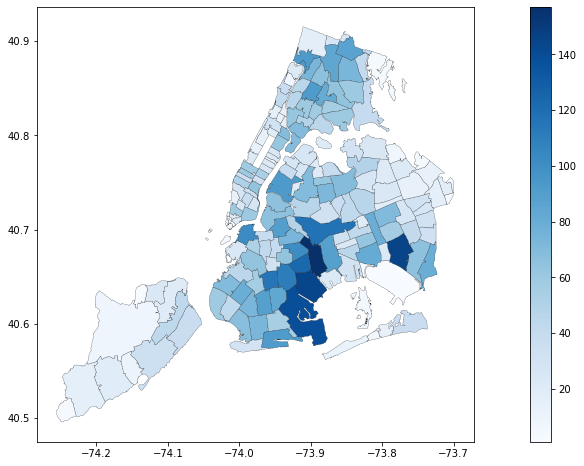

In [57]:
df_merge.plot(column="Crashes", legend=True, figsize = (20,8),
             cmap="Blues", edgecolor = "k",
             linewidth = 0.2)

<AxesSubplot:>

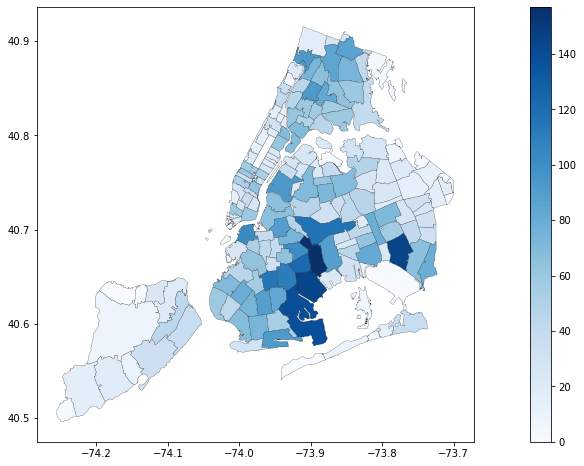

In [53]:
df_merge.plot(column="Crashes", legend=True, figsize = (20,8),
             cmap="Blues", edgecolor = "k",
             linewidth = 0.2)

## trajectory geojson

In [59]:
gdf_1

,medallion,passengers,fare,paymenttype,surcharge,mtatax,tip,tolls,total,pickuptime,dropofftime,nextpickuptime,key,hasfare,geometry
0,C87E6D2293BF8B907A0B7E4C2911AA5E,2,52,CRD,0,0.5,10.4,5.33,68.23,2007-01-13 05:30:00,2007-01-13 05:55:00,2007-01-13 06:57:00,0,True,"LINESTRING (-73.96145 40.76860, -73.96110 40.7..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-13 05:55:00,2007-01-13 06:57:00,NaT,0,False,"LINESTRING (-73.78106 40.64672, -73.78096 40.6..."
2,C87E6D2293BF8B907A0B7E4C2911AA5E,2,9.5,CRD,0,0.5,1.5,0,11.5,2007-01-13 06:57:00,2007-01-13 07:06:00,2007-01-13 07:26:00,1,True,"LINESTRING (-73.95152 40.77523, -73.95209 40.7..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-13 07:06:00,2007-01-13 07:26:00,NaT,1,False,"LINESTRING (-73.97365 40.75868, -73.97314 40.7..."
4,C87E6D2293BF8B907A0B7E4C2911AA5E,2,5,CRD,0,0.5,1,0,6.5,2007-01-13 07:26:00,2007-01-13 07:30:00,2007-01-13 07:47:00,2,True,"LINESTRING (-73.94972 40.77702, -73.95179 40.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-13 19:07:00,2007-01-13 19:19:00,NaT,34,False,"LINESTRING (-73.95702 40.76641, -73.95697 40.7..."
70,C87E6D2293BF8B907A0B7E4C2911AA5E,3,7.5,CRD,1,0.5,1.7,0,10.7,2007-01-13 19:19:00,2007-01-13 19:24:00,2007-01-13 19:36:00,35,True,"LINESTRING (-73.95590 40.76391, -73.95608 40.7..."
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-13 19:24:00,2007-01-13 19:36:00,NaT,35,False,"LINESTRING (-73.97553 40.74525, -73.97565 40.7..."
72,C87E6D2293BF8B907A0B7E4C2911AA5E,2,6,CRD,1,0.5,1,0,8.5,2007-01-13 19:36:00,2007-01-13 19:42:00,2007-01-13 19:51:00,36,True,"LINESTRING (-73.98551 40.73894, -73.98524 40.7..."
